## TP1KDE Kernel Density Estimation
* obligatory
* individual work
* The report (.pdf or jupyter notebook)  
    - should start with a short introdution
    - to explan the problem, 
    - explan a bit the specific method that you are going to use
    - should include a detailed description of your observations, e.g. comments on the forms of the density functions, the classification performance.

The TP is divided in three parts: 
* The first part concerns the definition of the appropriate functions for probability density estimation using kernels and the study of the effect of the h parameter on a simple artificial set. 
* The second concerns the application of the functions on the iris dataset. 
* The third is to apply the density estimation to a classification problem.

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.pyplot import show
from itertools import combinations

# make figures appear inline
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Define training set
Let your training set consist of four points

In [2]:
# Define training set
c = np.array([[1,1],[1,4],[3,2.5],[4,2.5]])
n = c.shape[0]

## Define test set
Create a regular set of points which cover the plane $[0, 5] \times [0, 5]$  and stores them in testSet

In [3]:
# Define test set
min_X, max_X = 0, 5
min_Y, max_Y = 0, 5
intLength = 30
x = np.linspace(min_X, max_X, num=intLength)
y = np.linspace(min_Y, max_Y, num=intLength)
testSet = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
X,Y = np.meshgrid(x,y)

In [4]:
print('testSet')
print( testSet)
print('testSet shape: ', testSet.shape)

testSet
[[0.         0.        ]
 [0.17241379 0.        ]
 [0.34482759 0.        ]
 ...
 [4.65517241 5.        ]
 [4.82758621 5.        ]
 [5.         5.        ]]
testSet shape:  (900, 2)


## Define of the appropriate functions for probability density estimation using kernels 

Open ```kde.py```, here you can find some examples you might need. you can either complete it or make your own code from scratch.

To compute the dencity estimation you can using the univariate version of kernel or the multivariate version of the kernel (use the one that you prefer). 

In [5]:
from kde import *

In [6]:
normalKernel1D(testSet[1])


array([0.39305655, 0.39894228])

In [7]:
normalKernelMultiD(testSet[1], c.shape[1])


0.15680687530236326

In [8]:
# multivariate version of Kernel
normalKernelMultiD(testSet[1]-c[1],c.shape[1])
multiKernel = deltaMultiD(testSet[1],c[1],0.2,c.shape[1])

In [9]:
# univariate version of Kernel
normalKernel1D(testSet[1]-c[1])
uniKernel = deltaProd(testSet[1],c[1],0.2,c.shape[1])

In [10]:
# Check that the univariate version of kernel and the multivariate version produce the same results

difference = np.linalg.norm(uniKernel - multiKernel)
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The two methods give the same result')
else:
    print('Uh-oh! The two methods are different')

Difference was: 0.000000
Good! The two methods give the same result


In [11]:
# Define parameters

# smoothing parameters
h = np.array([0.3,0.4,0.5])

# dimensionality of the test set
d = testSet.shape[1] 
print("dimensionality of the test set:"+str(d))

dimensionality of the test set:2


## Ex1. Plot p(x|ci) for every ci using h : 0.3, 0.4, 0.5 and comment your results. For a specific center (training point) comment how h influences the result.

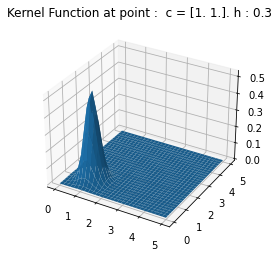

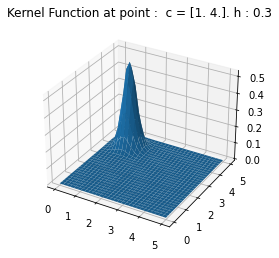

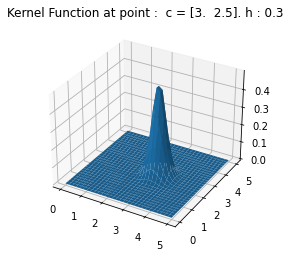

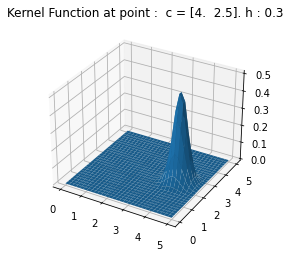

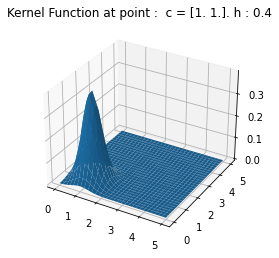

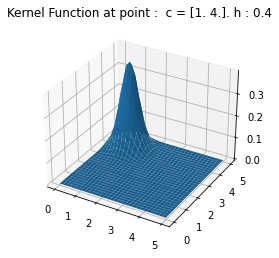

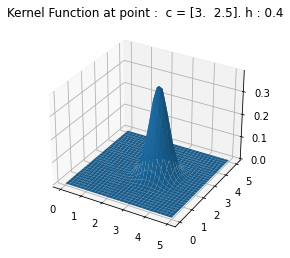

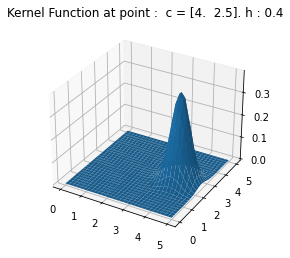

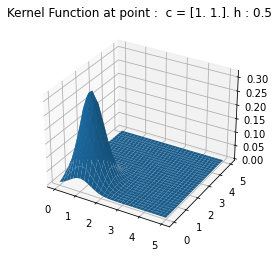

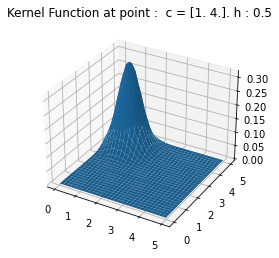

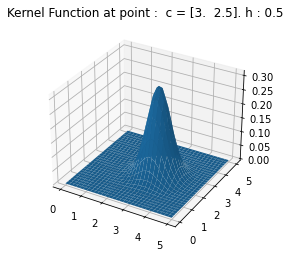

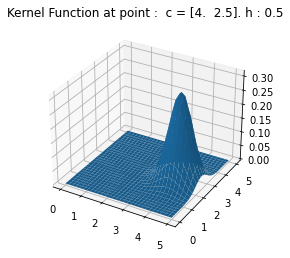

In [12]:
#plot conditional density function
for j in range(len(h)):
    for i in range(len(c)):
        fig=plt.figure()
        ax=fig.add_subplot(111,projection='3d')
        ax.set_title("Kernel Function at point :  c = "+str(c[i])+ ". h : "+str(h[j]))
        ax.plot_surface(X,Y,densityEstimation(testSet,c[i],h[j],c.shape[1]).reshape(30,30))


## Ex1. Plot p(x)  using h : 0.3, 0.4, 0.5 and comment your results. Discuss the effect ofthe size of h.

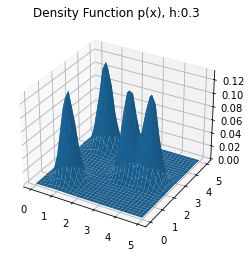

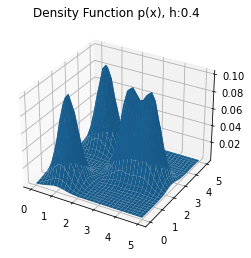

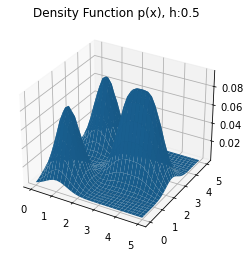

In [13]:
#plot density function 
for i in range(len(h)):
    fig=plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.set_title("Density Function p(x), h:"+str(h[i]))
    ax.plot_surface(X,Y,densityEstimation(testSet,c,h[i],c.shape[1]).reshape(30,30))

## Ex2. Iris dataset: Using the functions that you created above (exercise 1) work with the iris dataset.
* Plot the class conditional density of each attribute
* For a given pair of attributes draw the two dimensional density for each class
* Experiment with at least three different values of the h parameter and comment on your findings (in details).

In [14]:
# Load the Iris data.

from data_utils import load_IRIS



data_X, data_y = load_IRIS(test=False)

# As a sanity check, we print out the size of the data.
print('data shape: ', data_X.shape)
print('labels shape: ', data_y.shape)

data shape:  (150, 4)
labels shape:  (150,)


In [15]:
# useful functions than you maybe wont to use (it's up to you)
unique_y = np.unique (data_y)
points_by_class = [[x for x, t in zip (data_X, data_y) if t == c] for c in unique_y]
points_by_class_array = np.asarray(points_by_class)
print(points_by_class_array.shape)

labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
classes = ["Setosa", "Versicolour", "Virginica"]

(3, 50, 4)


In [16]:
def drawOneDGraph (x_min, x_max, id_attribute, colors, h=0.1):
    X = np.linspace(x_min, x_max, 200)
    fig, ax = plt.subplots()

    for c in range(len(unique_y)):
        DE = densityEstimation(X,points_by_class_array[c,:,id_attribute],h,1)
        ax.plot(X, DE, colors[c])

    ax.set(xlabel=labels[id_attribute], ylabel='p(x)')

    plt.show()

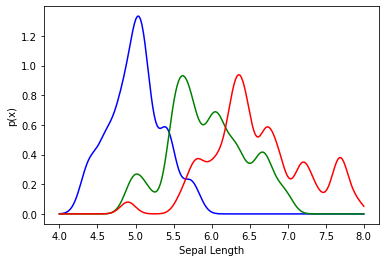

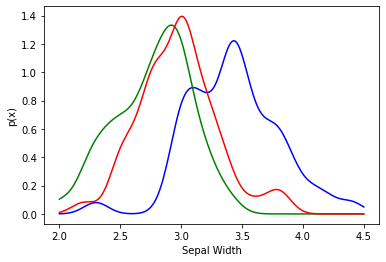

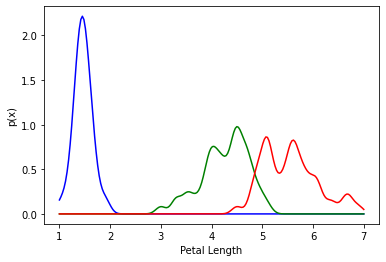

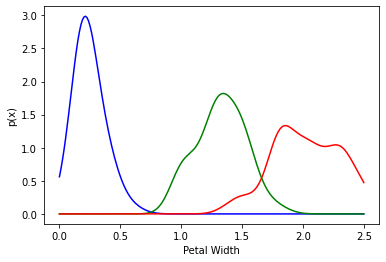

In [17]:
colors = ["b", "g", "r"]

drawOneDGraph(4, 8, 0, colors)
drawOneDGraph(2, 4.5, 1, colors)
drawOneDGraph(1, 7, 2, colors)
drawOneDGraph(0, 2.5, 3, colors)

In [18]:
min_X, max_X = 4, 8
min_Y, max_Y = 2, 4
intLength = 30
x = np.linspace(min_X, max_X, num=intLength)
y = np.linspace(min_Y, max_Y, num=intLength)
testSet = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
X,Y = np.meshgrid(x,y)

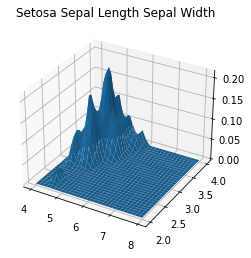

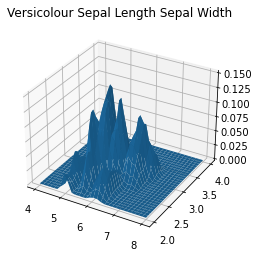

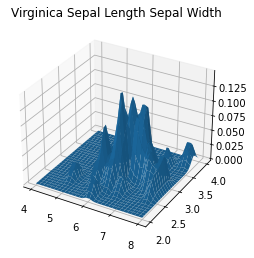

In [19]:
for c in range(len(unique_y)):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title(classes[c] + " " + labels[0] + " " + labels[1])
    ax.plot_surface(X,Y,densityEstimation(testSet,points_by_class_array[c,:,[0,1]].T,0.1,2).reshape(30,30))

In [20]:
min_X, max_X = 4, 8
min_Y, max_Y = 1, 6
intLength = 30
x = np.linspace(min_X, max_X, num=intLength)
y = np.linspace(min_Y, max_Y, num=intLength)
testSet = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
X,Y = np.meshgrid(x,y)

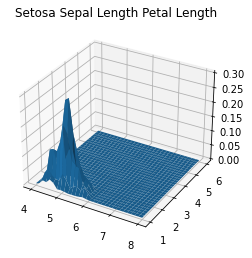

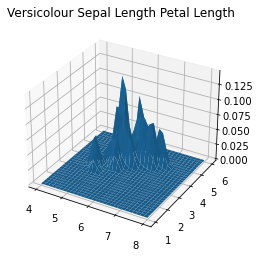

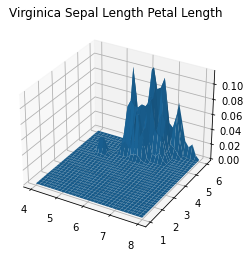

In [21]:
for c in range(len(unique_y)):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title(classes[c] + " " + labels[0] + " " + labels[2])
    ax.plot_surface(X,Y,densityEstimation(testSet,points_by_class_array[c,:,[0,2]].T,0.1,2).reshape(30,30))

In [22]:
min_X, max_X = 4, 8
min_Y, max_Y = 0, 2.5
intLength = 30
x = np.linspace(min_X, max_X, num=intLength)
y = np.linspace(min_Y, max_Y, num=intLength)
testSet = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
X,Y = np.meshgrid(x,y)

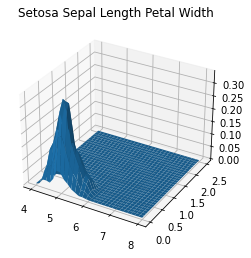

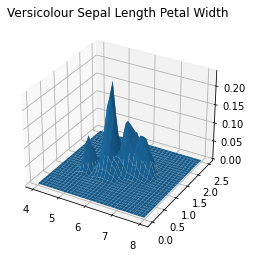

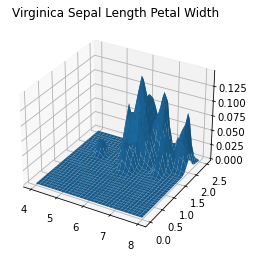

In [23]:
for c in range(len(unique_y)):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title(classes[c] + " " + labels[0] + " " + labels[3])
    ax.plot_surface(X,Y,densityEstimation(testSet,points_by_class_array[c,:,[0,3]].T,0.1,2).reshape(30,30))

## Ex3. Iris dataset: Naive Bayes
 Implement the Naive Bayes on iris dataset but now instead of assuming normal distribution estimate the probability distribution from the data using kernel density estimation with h : 0.3, 0.4, 0.5.
* Discuss the effect of the h parameter in the accuracy of the algorithm
* Compare with the results that you had in TP1 Naive Beyes

In [24]:
X_train, y_train, X_test, y_test = load_IRIS(test=True)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (100, 4)
Train labels shape:  (100,)
Test data shape:  (50, 4)
Test labels shape:  (50,)


In [25]:
def predict(x):
    labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
    classes = ["Setosa", "Versicolour", "Virginica"]
    d = points_by_class_array[0,:,:].shape[1]

    DE = np.zeros(len(classes))

    for attribut in range(len(labels)) :
        for class_ in range(len(classes)) :
            DE[class_] += np.sum(densityEstimation(x, points_by_class_array[class_,:,attribut], 0.3, d))
    
    return np.argmax(DE)

In [26]:
y_pred = np.zeros(len(y_test))

for i in range(len(y_test)):
    y_pred[i] = predict(X_test[i])
    
acc_test = (y_pred == y_test).mean()
print(acc_test)

0.96
